In [1]:
import sys
sys.path.insert(0, '../')
from bibliotecas import base_estudantes, job, magalu, alunos, petrobras, sns, np, pd, plt, yf, px, go, sp, wn, quandl, date, db, geobr, gpd, os
wn.filterwarnings('ignore')

In [2]:
# https://www.fao.org/faostat/en/#data

In [3]:
df = pd.read_csv('fao.csv', sep=',')

In [4]:
df

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value
0,QCL,Crops and livestock products,21,Brazil,5312,Area harvested,515,Apples,1961,1961,ha,2097
1,QCL,Crops and livestock products,21,Brazil,5312,Area harvested,515,Apples,1962,1962,ha,2349
2,QCL,Crops and livestock products,21,Brazil,5312,Area harvested,515,Apples,1963,1963,ha,2324
3,QCL,Crops and livestock products,21,Brazil,5312,Area harvested,515,Apples,1964,1964,ha,2271
4,QCL,Crops and livestock products,21,Brazil,5312,Area harvested,515,Apples,1965,1965,ha,2375
...,...,...,...,...,...,...,...,...,...,...,...,...
175,QCL,Crops and livestock products,21,Brazil,5510,Production,515,Apples,2016,2016,tonnes,1055383
176,QCL,Crops and livestock products,21,Brazil,5510,Production,515,Apples,2017,2017,tonnes,1307642
177,QCL,Crops and livestock products,21,Brazil,5510,Production,515,Apples,2018,2018,tonnes,1203007
178,QCL,Crops and livestock products,21,Brazil,5510,Production,515,Apples,2019,2019,tonnes,1222949


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Domain Code      180 non-null    object
 1   Domain           180 non-null    object
 2   Area Code (FAO)  180 non-null    int64 
 3   Area             180 non-null    object
 4   Element Code     180 non-null    int64 
 5   Element          180 non-null    object
 6   Item Code (FAO)  180 non-null    int64 
 7   Item             180 non-null    object
 8   Year Code        180 non-null    int64 
 9   Year             180 non-null    int64 
 10  Unit             180 non-null    object
 11  Value            180 non-null    int64 
dtypes: int64(6), object(6)
memory usage: 17.0+ KB


<AxesSubplot:>

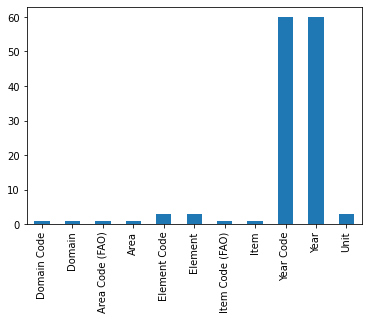

In [6]:
df.drop(columns=['Value']).nunique().plot(kind='bar')

In [7]:
# colunas constantes (de valores unicos)
df.columns[df.nunique()==1]

Index(['Domain Code', 'Domain', 'Area Code (FAO)', 'Area', 'Item Code (FAO)',
       'Item'],
      dtype='object')

In [8]:
df.drop(columns=df.columns[df.nunique()==1], inplace=True)

In [9]:
df

,Element Code,Element,Year Code,Year,Unit,Value
0,5312,Area harvested,1961,1961,ha,2097
1,5312,Area harvested,1962,1962,ha,2349
2,5312,Area harvested,1963,1963,ha,2324
3,5312,Area harvested,1964,1964,ha,2271
4,5312,Area harvested,1965,1965,ha,2375
...,...,...,...,...,...,...
175,5510,Production,2016,2016,tonnes,1055383
176,5510,Production,2017,2017,tonnes,1307642
177,5510,Production,2018,2018,tonnes,1203007
178,5510,Production,2019,2019,tonnes,1222949


In [10]:
df.drop(columns=['Year Code', 'Element Code'], inplace=True)

In [11]:
df

,Element,Year,Unit,Value
0,Area harvested,1961,ha,2097
1,Area harvested,1962,ha,2349
2,Area harvested,1963,ha,2324
3,Area harvested,1964,ha,2271
4,Area harvested,1965,ha,2375
...,...,...,...,...
175,Production,2016,tonnes,1055383
176,Production,2017,tonnes,1307642
177,Production,2018,tonnes,1203007
178,Production,2019,tonnes,1222949


In [12]:
df.Year = pd.to_datetime(df.Year, format='%Y')

In [13]:
df

,Element,Year,Unit,Value
0,Area harvested,1961-01-01,ha,2097
1,Area harvested,1962-01-01,ha,2349
2,Area harvested,1963-01-01,ha,2324
3,Area harvested,1964-01-01,ha,2271
4,Area harvested,1965-01-01,ha,2375
...,...,...,...,...
175,Production,2016-01-01,tonnes,1055383
176,Production,2017-01-01,tonnes,1307642
177,Production,2018-01-01,tonnes,1203007
178,Production,2019-01-01,tonnes,1222949


In [14]:
df.Element.replace({'Area harvested':'Area colhida', 'Production':'Producao', 'Yield':'Produtividade'}, inplace=True)

In [15]:
df.Element.unique()

array(['Area colhida', 'Produtividade', 'Producao'], dtype=object)

In [16]:
df.columns = ['Elemento', 'Ano', 'Unidade', 'Valor']

In [17]:
df

,Elemento,Ano,Unidade,Valor
0,Area colhida,1961-01-01,ha,2097
1,Area colhida,1962-01-01,ha,2349
2,Area colhida,1963-01-01,ha,2324
3,Area colhida,1964-01-01,ha,2271
4,Area colhida,1965-01-01,ha,2375
...,...,...,...,...
175,Producao,2016-01-01,tonnes,1055383
176,Producao,2017-01-01,tonnes,1307642
177,Producao,2018-01-01,tonnes,1203007
178,Producao,2019-01-01,tonnes,1222949


In [18]:
df.set_index('Ano', inplace=True)

In [19]:
df

,Elemento,Unidade,Valor
Ano,,,
1961-01-01,Area colhida,ha,2097
1962-01-01,Area colhida,ha,2349
1963-01-01,Area colhida,ha,2324
1964-01-01,Area colhida,ha,2271
1965-01-01,Area colhida,ha,2375
...,...,...,...
2016-01-01,Producao,tonnes,1055383
2017-01-01,Producao,tonnes,1307642
2018-01-01,Producao,tonnes,1203007


<AxesSubplot:xlabel='Ano'>

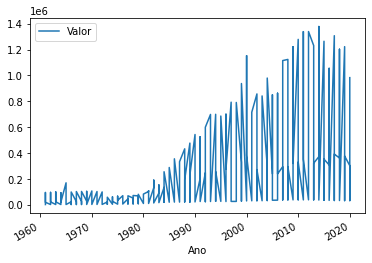

In [20]:
df.plot()

In [21]:
novodf  =  df.pivot_table(index='Ano', columns='Elemento', values='Valor')

<AxesSubplot:xlabel='Ano'>

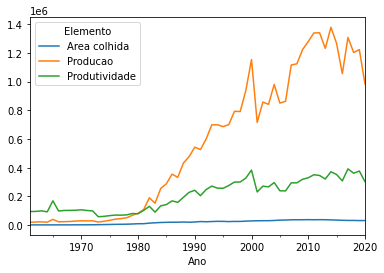

In [22]:
novodf.plot()

<AxesSubplot:xlabel='Ano'>

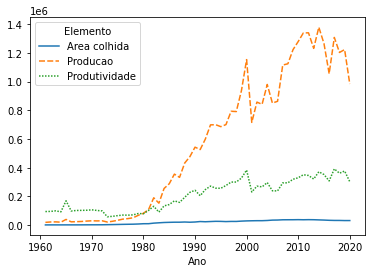

In [23]:
sns.lineplot(data=novodf)

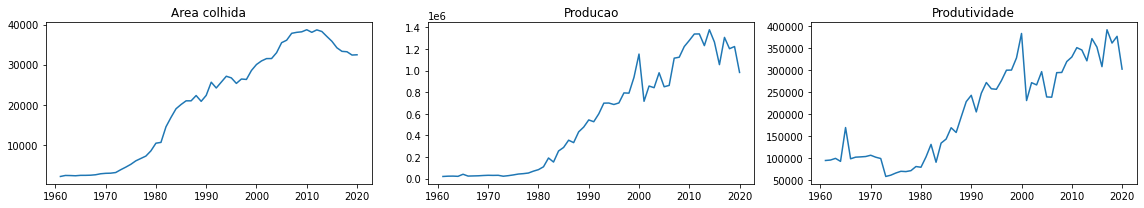

In [24]:
f,a = plt.subplots(1,3,figsize=(16,3))
for i, c in enumerate(novodf.columns):  
    sns.lineplot(data=novodf[c], ax=a[i])
    a[i].set_ylabel('')
    a[i].set_xlabel('')
    a[i].set_title(c)

f.tight_layout()